# REPRESENTER LES IMAGES

## La structure de tenseur



In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

from PIL.Image import *

from imageio import imread
import glob


matplotlib.rcParams['font.size'] = 18


In [2]:
def imshow(img, title=''):
    plt.title(title)
    if image.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        if img.shape[2] == 1:
          img = np.repeat(img, repeats=3, axis=2)
        plt.imshow(img)
    
    plt.show()


In [3]:
list_images = []
list_label = []

for image_path in glob.glob("test/*.png"):
    image = imread(image_path)
    list_images.append(image)
    debut = 5
    fin = image_path.find('i')
    list_label.append(int(image_path[debut:fin]))

n = len(list_images)

## Les differents types

In [4]:
def uint8_RGB_to_float32(img):
    return img.astype(np.float32)/255.

def uint8_GRAY_to_float32(img):
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img, axis=-1)
    # img = np.tile(img, (1, 1, 3))
    return img

def bool_to_float32(img):
    img = img.astype(np.float32)
    img = np.expand_dims(img, axis=-1)
    # img = np.tile(img, (1, 1, 3))
    return img

def float32_to_uint8(img):
    img = 255.*img
    return img.astype(np.uint8)

def to_float32(img):
    if img.dtype == 'uint8':
        if img.ndim == 2:
            return uint8_GRAY_to_float32(img)
        else:
            return uint8_RGB_to_float32(img)
    if img.dtype == 'bool':
        return bool_to_float32(img)

for i in range(len(list_images)) :
    img = list_images[i]
    img = to_float32(img)
    list_images[i] = img

# MANIPULER DES IMAGES

## Rotation de 90 degrés

**Question 1**


In [5]:
def rotate90(img) :
  dims = (img.shape[1], img.shape[0], img.shape[2])
  copie = np.zeros(shape=dims)
  for i in range(len(img[0])) :
    for j in range(len(img)) :
      copie[i][j] = img[j][i].copy()
  return copie

## Mise à l'échelle

**Question 2**

In [6]:
def reduce_resolution(img, k) :
  if k==0 :
    return img
  dims = (img.shape[0]//2, img.shape[1]//2, img.shape[2])
  copie = np.zeros(shape=dims)
  for i in range (copie.shape[0]):
    for j in range(copie.shape[1]) :
        copie[i,j]=1/4 * (img[2*i,2*j]+img[2*i+1,2*j]+img[2*i,2*j+1]+img[2*i+1,2*j+1])
  return reduce_resolution(copie,k-1)

**Question 3**

In [7]:
def get_value_naive(img,x,y) :
  if int(x)>=img.shape[0] or int(x)<0 or int(y)<0 or int(y)>=img.shape[1] :
    return np.zeros(shape = img.shape[2])
  return(img[int(x),int(y)])

In [8]:
def rescale_naive(img, w_new, h_new) :
  dims = (h_new, w_new, img.shape[2])
  copie = np.zeros(shape=dims)
  for i in range (h_new) :
    for j in range (w_new) :
      copie[i][j] = get_value_naive(img, i*img.shape[0]/h_new, j*img.shape[1]/w_new)
  return (copie)

## Rotation générale

**Question 4**

In [9]:
def rotate_naive(img, theta) :
  copie = np.zeros(shape=img.shape)
  for i in range (img.shape[0]) :
    for j in range (img.shape[1]) :
      x = img.shape[0]/2+np.cos(theta)*(i-img.shape[0]/2)-np.sin(theta)*(-j+img.shape[1]/2)
      y = img.shape[0]/2-np.sin(theta)*(i-img.shape[0]/2)-np.cos(theta)*(-j+img.shape[1]/2)
      copie[i,j] = get_value_naive(img,x,y)

  return (copie)

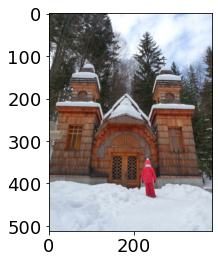

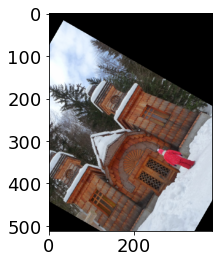

In [10]:
image = list_images[0]
image = reduce_resolution(image, 2)
imshow(image)
image = rotate_naive(image, np.pi / 3.)
imshow(image)

**Question 5**

In [11]:
def bilinear_interp(img, x, y) :
  if int(x)>=img.shape[0]-1 or int(x)<0 or int(y)<0 or int(y)>=img.shape[1]-1 :
    return np.zeros(shape = img.shape[2])
  x1 = int(np.floor(x))
  x2 = int(np.ceil(x))
  y1 = int(np.floor(y))
  y2 = int(np.ceil(y))
  dx = x-x1
  dy = y-y1
  Deltax = x2-x1
  Deltay = y2-y1
  Deltafx = img[x2,y1]-img[x1,y1]
  Deltafy = img[x1,y2]-img[x1,y1]
  Deltafxy = img[x1,y1] + img[x2,y2] - img[x2,y1]-img[x1,y2]
  if Deltax == 0 :
    if Deltay == 0 :
      return img[x1,y1]
    return(img[x1,y1]+Deltafy*dy/Deltay)
  if Deltay==0 :
    return(img[x1,y1]+Deltafx*dx/Deltax)
  return (Deltafx*dx/Deltax + Deltafy*dy/Deltay + Deltafxy*dx/Deltax*dy/Deltay+img[x1,y1])

def rescale(img,w_new, h_new) :
  dims = (h_new, w_new, img.shape[2])
  copie = np.zeros(shape=dims)
  for i in range (h_new) :
    for j in range (w_new) :
      copie[i][j] = bilinear_interp(img, i*img.shape[0]/h_new, j*img.shape[1]/w_new)
  return (copie)



def rotate(img, theta) :
  copie = np.zeros(shape=img.shape)
  for i in range (img.shape[0]) :
    for j in range (img.shape[1]) :
      x = img.shape[0]/2+np.cos(theta)*(i-img.shape[0]/2)-np.sin(theta)*(-j+img.shape[1]/2)
      y = img.shape[0]/2-np.sin(theta)*(i-img.shape[0]/2)-np.cos(theta)*(-j+img.shape[1]/2)
      copie[i,j] = bilinear_interp(img,x,y)
  return (copie)

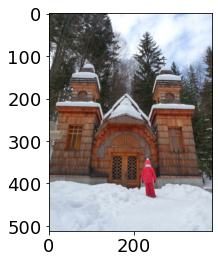

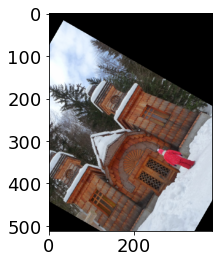

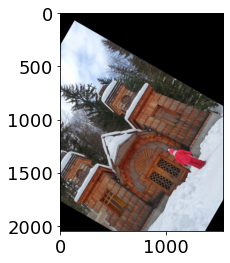

In [12]:
image = list_images[0]
image = reduce_resolution(image, 2)
imshow(image)
image = rotate_naive(image, np.pi / 3.)
imshow(image)
image = list_images[0]
image = rotate(image, np.pi / 3.)
imshow(image)

# LES BASES DU FILTRAGE

### Débruiter avec un filtre median

In [13]:
def median_filter(img, n) :
  dims = img.shape
  copie = np.zeros(shape=dims)
  for coord in range (dims[2]) :
    for i in range (dims[0]) :
      for j in range(dims[1]) :
        voisins = []
        for deltai in range(-n//2,n//2+1) :
          for deltaj in range(-n//2,n//2+1) :
            if i+deltai>0 and i+deltai<dims[0] and j+deltaj>0 and j+deltaj<dims[0] :
              voisins.append(img[i+deltai,j+deltaj, coord])
        voisins = np.array(voisins)
        copie[i,j,coord] = np.median(voisins)
  return copie

In [14]:
def salt_noise(img, t):
  img = img.copy()
  w = img.shape[0]
  h = img.shape[1]
  for i in range(w):
      for j in range(h):
        r = np.random.rand()
        if r > t:
          img[i, j, :] = 1.
  return img

Même si on a perdu un peu en netteté (notament au niveau du visage et du cou), le bruit a totalement disparu.

## Filtres convolutifs
### L'operation de convolution

In [15]:
def rgb_to_bandw(img) :
  if img.shape[2] == 1 :
    return img
  else :
    copie = np.zeros(shape=(img.shape[0],img.shape[1],1))
    for i in range(img.shape[0]) :
      for j in range(img.shape[1]) :
          copie[i,j]=0.21*img[i,j,0]+0.72*img[i,j,1]+0.07*img[i,j,2]
    return copie

In [16]:
for i in range(len(list_images)) :
  list_images[i] = rgb_to_bandw(list_images[i])

# à partir de maintenant toutes nos images sont en noir et blanc

### Flou gaussien

In [17]:
filtre_gauss = (1./273.)*np.array([[1., 4. , 7. , 4. , 1.],
           [4., 16., 26., 16., 4.],
           [7., 26., 41., 26., 7.],
           [4., 16., 26., 16., 4.],
           [1., 4. , 7. , 4. , 1.]])

**Question 7**

In [18]:
def convolution(img, w) :
  pad_copie=np.pad(img, pad_width = [(w.shape[0]//2,w.shape[0]//2),(w.shape[1]//2,w.shape[1]//2),(0,0)], mode = 'edge')
  res = np.zeros(shape = img.shape)
  for i in range (res.shape[0]) :
    for j in range (res.shape[1]) :
      for k in range(w.shape[0]) :
        for l in range(w.shape[1]) :
          res[i,j,0]+=w[k,l]*pad_copie[i+k,j+l,0]
  return res

def gaussian_blur(img) :
  return convolution(img, filtre_gauss)

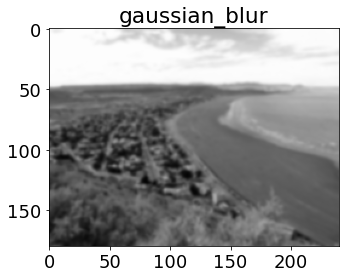

In [73]:
image = list_images[0]
image = reduce_resolution(image, 2)
imshow(gaussian_blur(image), 'gaussian_blur')

### Noyaux separables

**Question 8**

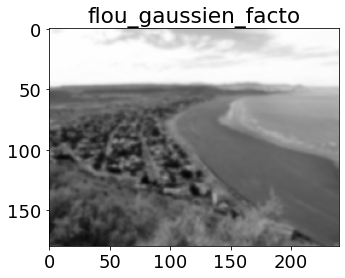

In [74]:
fact_gaussien = np.array([[0.006, 0.061, 0.242, 0.383, 0.242, 0.061, 0.006]])

image = list_images[0]
image = reduce_resolution(image, 2)
imshow(convolution(convolution(image,fact_gaussien), np.transpose(fact_gaussien)), 'flou_gaussien_facto')

### Motion blur
**Question 9**

In [19]:
def motion_blur45(img,n) :
  matrice = 1./n*np.eye(n)
  return convolution(img, matrice)

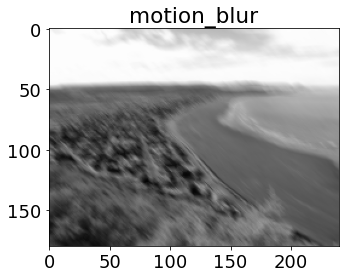

In [77]:
image = list_images[0]
image = reduce_resolution(image, 2)
imshow(motion_blur45(image,5), 'motion_blur')

## Détection de contours
### Gradient d'une image

In [78]:
w1 = np.array([[0,  0, -1,  0,  0],
               [0,  0, -1,  0,  0],
               [0,  0,  2,  0,  0],
               [0,  0,  0,  0,  0],
               [0,  0,  0,  0,  0]])


w2= np.array([[0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0,  4,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0]])


w3 = np.array([[-1,  0,  0,  0,  0],
               [ 0, -2,  0,  0,  0],
               [ 0,  0,  6,  0,  0],
               [ 0,  0,  0, -2,  0],
               [ 0,  0,  0,  0, -1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


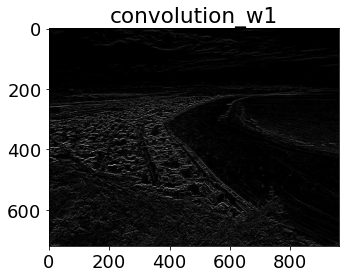

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


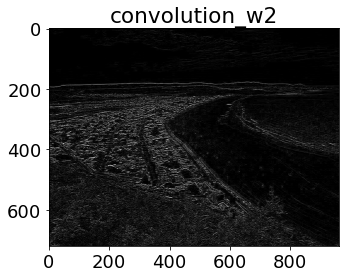

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


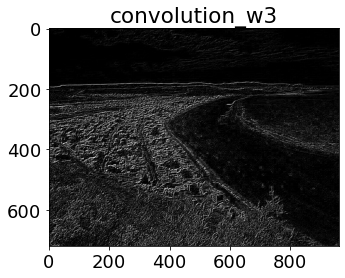

In [79]:
image = list_images[0]

imshow(convolution(image,w1), 'convolution_w1')
imshow(convolution(image,w2), 'convolution_w2')
imshow(convolution(image,w3), 'convolution_w3')

En effet cette méthode n'est pas très concluante, même si le résultat (notament pour $w_3$) n'est pas catastrophique.

**Question 10**

In [19]:
w_y = np.array([[-1, 0, 1], 
                [-2, 0, 2], 
                [-1, 0, 1]], np.float32) 

#car y est ici notre axe horizontale

w_x = np.array([[ 1,  2, 1], 
                [ 0,  0, 0], 
                [-1, -2, -1]], np.float32)
#car x est ici notre axe verticale


def grad_x(img) :
  return convolution(img,w_x)

def grad_y(img) :
  return convolution(img,w_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


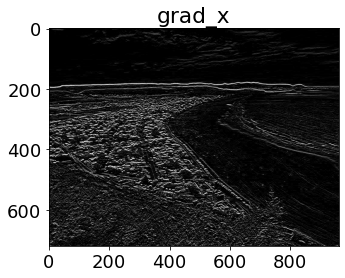

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


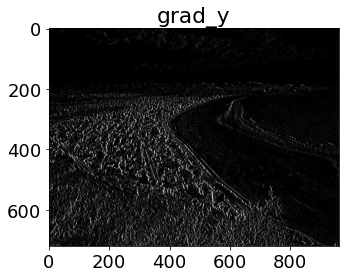

In [81]:
img = list_images[0]
imshow(grad_x(img), 'grad_x')
imshow(grad_y(img), 'grad_y')

On constate bien que l'on mesure les bons gradients (notament au niveau de la fusée qui a des limites verticales, et donc un gradient horizontale).

**Question 11**

In [20]:
def vis_grad(img, s) :
  copie_reduite = rescale(np.log(1+img), int(s*img.shape[1]), int(s*img.shape[0]))
  #copie_reduite = rescale(img, int(s*img.shape[1]), int(s*img.shape[0]))
  gradx = grad_x(copie_reduite)
  grady = grad_y(copie_reduite)
  res = np.zeros(shape = (copie_reduite.shape[0], copie_reduite.shape[1], 3))
  for i in range (copie_reduite.shape[0]):
    for j in range (copie_reduite.shape[1]):
      res[i,j,1] = gradx[i,j]
      res[i,j,2] = grady[i,j]
  return res

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


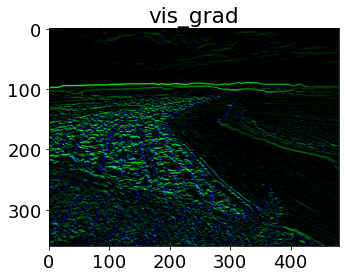

In [83]:
img = list_images[0]
imshow(vis_grad(img,0.5), 'vis_grad')

In [21]:
def naive_contour(img,s) :
  copie_reduite = rescale(1+np.log(img), int(s*img.shape[1]), int(s*img.shape[0]))
  gradx = grad_x(copie_reduite)
  grady = grad_y(copie_reduite)
  res = np.zeros(shape = copie_reduite.shape)
  for i in range (copie_reduite.shape[0]):
    for j in range (copie_reduite.shape[1]):
      res[i,j,0] = np.sqrt(gradx[i,j,0]**2+grady[i,j,0]**2)
  res = (res-np.min(res))/(np.max(res)-np.min(res))
  return res

def naive_contour_seuil(img,s, seuil) :
  contour = naive_contour(img,s)
  res = np.zeros(shape = contour.shape)
  for i in range (contour.shape[0]):
    for j in range (contour.shape[1]):
      if contour[i,j,0]>seuil :
        res[i,j,0]=1
  return res  

<ipython-input-84-f384e339fd98>:2: RuntimeWarning: divide by zero encountered in log
  copie_reduite = rescale(1+np.log(img), int(s*img.shape[1]), int(s*img.shape[0]))
<ipython-input-59-1c2ac54ddf11>:12: RuntimeWarning: invalid value encountered in subtract
  Deltafx = img[x2,y1]-img[x1,y1]
<ipython-input-59-1c2ac54ddf11>:13: RuntimeWarning: invalid value encountered in subtract
  Deltafy = img[x1,y2]-img[x1,y1]
<ipython-input-59-1c2ac54ddf11>:14: RuntimeWarning: invalid value encountered in subtract
  Deltafxy = img[x1,y1] + img[x2,y2] - img[x2,y1]-img[x1,y2]
<ipython-input-71-89f5ec6f21a2>:8: RuntimeWarning: invalid value encountered in multiply
  res[i,j,0]+=w[k,l]*pad_copie[i+k,j+l,0]
<ipython-input-71-89f5ec6f21a2>:8: RuntimeWarning: invalid value encountered in double_scalars
  res[i,j,0]+=w[k,l]*pad_copie[i+k,j+l,0]


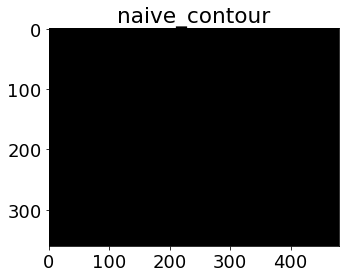

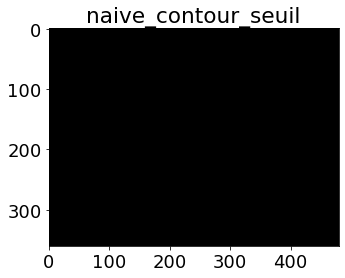

In [85]:
img = list_images[0]
imshow(naive_contour(img,0.5), 'naive_contour')
imshow(naive_contour_seuil(img,0.5,0.1), 'naive_contour_seuil')

La méthode n'est pas catastrophique, mais n'est pas suffisante.

### La méthode de détection de contours de Canny

**Question 12**

In [22]:
def polar_gradient(img) :
  copie = gaussian_blur(img)
  gradx = grad_x(copie)
  grady = grad_y(copie)

  # on normalise le gradient
  max = 0
  for i in range (copie.shape[0]) :
    for j in range (copie.shape[1]) :
      if max < (abs(gradx[i,j,0])+abs(grady[i,j,0])) :
        max = abs(gradx[i,j,0])+abs(grady[i,j,0])
  gradx = (1/max)*gradx
  grady = (1/max)*grady

  # on construit I et D
  I = abs(gradx) + abs(grady)
  D = np.arctan2(grady,gradx)

  return I,D

In [23]:
def non_max_suppression(I,D) :
  NMS = np.zeros(I.shape)
  for i in range(I.shape[0]) :
    for j in range(I.shape[1]) : #on regarde si le gradient est plus verticale ou plus horizontale,
                                 #puis on vérifie que notre case est plus grande que ses 2 voisins dans cette direction
      if ( (-3*np.pi/4<=D[i,j,0]<=-np.pi/4 or np.pi/4<=D[i,j,0]<=3*np.pi/4) and ( (j-1>0 and I[i,j-1,0]-I[i,j,0]>=0) or (j+1<I.shape[1] and I[i,j+1,0]-I[i,j,0]>=0)) ) or\
         ( (3*np.pi/4<=D[i,j,0] or D[i,j,0]<=-3*np.pi/4 or -np.pi/4<=D[i,j,0]<=np.pi/4) and ( (i-1>0 and I[i-1,j,0]-I[i,j,0]>=0) or (i+1<I.shape[0] and I[i+1,j,0]-I[i,j,0]>=0) ) ) :
        NMS[i,j,0] = 0
      else :
        NMS[i,j,0] = I[i,j,0]

  return NMS

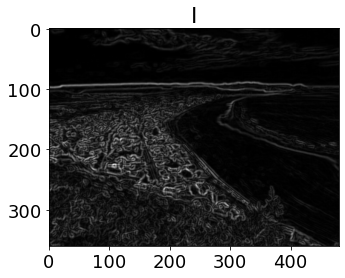

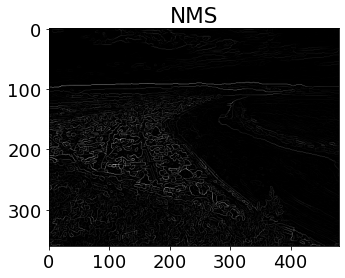

In [88]:
I,D = polar_gradient(reduce_resolution(list_images[0],1))
imshow(I,'I')
imshow(non_max_suppression(I,D), 'NMS')

Notre fonction NMS fait bien le boulot qu'on lui demande, on obtient des "limites" de 1 pixel de large.

**Question 13**

In [24]:
def threshold(img, high, low) :
  copie = np.zeros(img.shape)
  for i in range(img.shape[0]) :
    for j in range(img.shape[1]) :
      if img[i,j,0]>=high :
        copie[i,j,0] = 1
      elif img[i,j,0]<=low :
        copie[i,j,0] = 0
      else :
        copie[i,j,0] = 0.3
  return copie

**Question 14**

In [25]:
def hysteresis(img, weak=0.3) :
  copie = np.zeros(img.shape)
  for i in range(img.shape[0]) :
    for j in range(img.shape[1]) :
      if img[i,j,0]>0.99 :
        copie[i,j,0]=1
      elif weak-0.01<img[i,j,0]<weak+0.01:
        if (i-1>=0 and copie[i-1,j,0]>=0.99) or (j-1>=0 and copie[i,j-1,0]>0.99) or (i+1<img.shape[0] and copie[i+1,j,0]>0.99) or (j+1<img.shape[1] and copie[i,j+1,0]>0.99) or\
           (i-1>=0 and j-1>0 and copie[i-1,j-1,0]>=0.99) or (i+1<img.shape[0] and j-1>0 and copie[i+1,j-1,0]>=0.99) or\
           (i-1>=0 and j+1<img.shape[1] and copie[i-1,j+1,0]>=0.99) or (i+1<img.shape[0] and j+1<img.shape[1] and copie[i+1,j+1,0]>=0.99) :
          copie[i,j,0] = 1
        else :
          copie[i,j,0] = 0
      else :
        copie[i,j,0] = 0
  for i in range(img.shape[0]-1,-1,-1) : #comme on accepte les pixels indécis de manière dynamique, on le fait dans les 2 sens pour être sur d'en oublier aucun
    for j in range(img.shape[1]-1,-1,-1) :
      if img[i,j,0]>0.99 :
        copie[i,j,0]=1
      elif weak-0.01<img[i,j,0]<weak+0.01:
        if (i-1>=0 and copie[i-1,j,0]>=0.99) or (j-1>=0 and copie[i,j-1,0]>0.99) or (i+1<img.shape[0] and copie[i+1,j,0]>0.99) or (j+1<img.shape[1] and copie[i,j+1,0]>0.99) :
          copie[i,j,0] = 1
        else :
          copie[i,j,0] = 0
      else :
        copie[i,j,0] = 0
  return copie

**Question 15**

In [26]:
def canny_edge_detection(img, high, low) :
  I,D = polar_gradient(img)
  NMS = non_max_suppression(I,D)
  res = hysteresis(threshold(NMS,high, low))
  return res

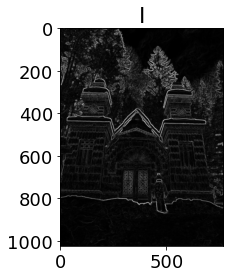

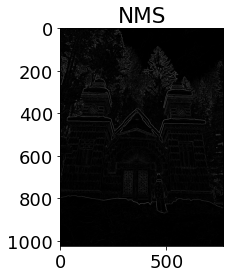

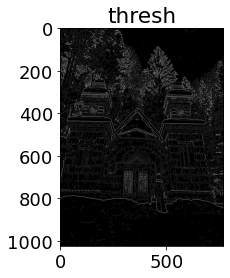

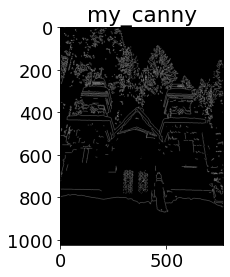

In [27]:
high, low = 0.25, 0.05 #je suis obligé de changer ces valeurs par rapport au TD pour avoir quelque chose de potable
image_original = list_images[0]
reduced = reduce_resolution(image_original, 1)
I,D = polar_gradient(reduced)
NMS = non_max_suppression(I,D)
thresh = (threshold(NMS,high, low))
my_canny = hysteresis(thresh)

imshow(I, 'I')
imshow(NMS, 'NMS')
imshow(thresh, 'thresh')
imshow(my_canny,'my_canny')

On obtient un résultat comparable à celui de open_cv, et en effet les textures et les contours sont confondus.

On obtient de bien meilleurs résultats sur l'astronaut, avec un niveau de détail plus faible que open_cv (notament au niveau du blouson), ce qui n'est pas problématique en soit car on ne veut que les contours extérieurs.

### Détecter des structures filamentaires par la méthode de la Hessienne

In [28]:
d2dx2 = np.array([[0, 0, 0], 
                  [1, -2, 1], 
                  [0, 0, 0]], np.float32) 

d2dxdy = np.array([[1, 0, -1], 
                   [0, 0, 0], 
                   [-1, 0, 1]], np.float32)

d2dy2 = np.array([[0, 1, 0], 
                  [0, -2, 0], 
                  [0, 1, 0]], np.float32)  

In [29]:
def vis_hessian(img) :
  H = np.zeros(shape = (img.shape[0], img.shape[1], 2, 2))
  v = np.zeros(shape = (img.shape[0], img.shape[1], 2))
  a = np.zeros(shape = (img.shape[0], img.shape[1]))
  s = np.zeros(shape = (img.shape[0], img.shape[1]))
  res = np.zeros(shape = (img.shape[0], img.shape[1], 3))
  d2imgdx2 = convolution(img, d2dx2)
  d2imgdxdy = convolution(img, d2dxdy)
  d2imgdy2 = convolution(img, d2dy2)
  for i in range(img.shape[0]) :
    for j in range(img.shape[1]) :
      H[i,j,0,0] = d2imgdx2[i,j,0]
      H[i,j,0,1] = d2imgdxdy[i,j,0]
      H[i,j,1,0] = d2imgdxdy[i,j,0]
      H[i,j,1,1] = d2imgdy2[i,j,0]
      val_propres, vect_propres = np.linalg.eigh(H[i,j])
      if abs(val_propres[0])>abs(val_propres[1]) :
        a[i,j] = np.abs(val_propres[0])
        v[i,j] = vect_propres[0]
      else :
        a[i,j] = np.abs(val_propres[1])
        v[i,j] = vect_propres[1]
      s[i, j] = np.abs(v[i, j, 1])
      H[i,j] = np.array([[val_propres[0], 0],[0, val_propres[1]]])
      res[i,j] = np.array([0, a[i,j]*s[i,j], a[i,j]*(1-s[i,j])])
      res[i,j] = res[i,j]
  return res

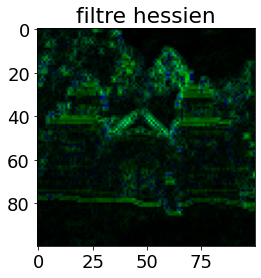

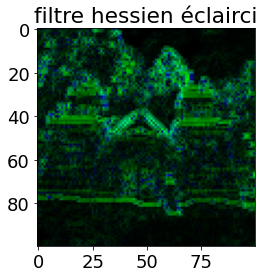

In [30]:
img = list_images[0]
img = rescale(img,100, 100)
img = vis_hessian(img)
img = (img-np.min(img))/(np.max(img)-np.min(img))
imshow(img, "filtre hessien")
for i in range(2) :
  img = np.log(1+img)
  img = (img-np.min(img))/(np.max(img)-np.min(img))
imshow(img, "filtre hessien éclairci")